In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
import numpy as np
from itertools import tee
from gui.user_code import pairwise_randomised_significance, get_data_for_signif_test
from gui.output_utils import get_cv_fold_count, get_cv_scores_many_experiment
from gui.constants import CLASSIFIER

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


# Does the classification evaluation framework work?
What is the effect of adding uniform random noise to vectors? Can our experiments tell between a set of vectors and a corrupted version of the same vectors? To find out, add uniform random noise from $-n$ to $n$ (x axis) to all non-zero entries in a set of `word2vec` embeddings.
     

In [2]:
def plot(d):
    experiments = Experiment.objects.filter(**d).order_by('expansions__noise')
    e = [x.id for x in experiments if x.expansions.entries_of is None]
    print('experiments are', e)

    for eid in e:
        print('id %d noise %2.2f, acc %2.2f, macrof1 %2.2f'%(eid,
                                              Experiment.objects.get(id=eid).expansions.noise,
                                              Results.objects.get(id=eid, classifier=CLASSIFIER).accuracy_mean,
                                              Results.objects.get(id=eid, classifier=CLASSIFIER).macrof1_mean))

    df = dataframe_from_exp_ids(e, {'noise':'expansions__noise'})
    df['tidy_noise'] = ['%1.1f'%float(x) for x in df.noise]
    ax = sns.factorplot(x='tidy_noise', y='Accuracy', data=df, kind='bar', aspect=1.5);
    ax.set_xlabels('')

    # random baseline for comparison
    plt.axhline(random_vect_baseline(), c='k')

experiments are [123, 100, 154, 101, 155, 102, 156, 103, 157, 104, 158, 105, 159, 106, 160, 107, 161, 108, 162, 109, 163]
id 123 noise 0.00, acc 0.46, macrof1 0.42
id 100 noise 0.20, acc 0.47, macrof1 0.44
id 154 noise 0.20, acc 0.47, macrof1 0.43
id 101 noise 0.40, acc 0.47, macrof1 0.43
id 155 noise 0.40, acc 0.48, macrof1 0.44
id 102 noise 0.60, acc 0.44, macrof1 0.40
id 156 noise 0.60, acc 0.44, macrof1 0.39
id 103 noise 0.80, acc 0.40, macrof1 0.35
id 157 noise 0.80, acc 0.38, macrof1 0.34
id 104 noise 1.00, acc 0.35, macrof1 0.31
id 158 noise 1.00, acc 0.35, macrof1 0.31
id 105 noise 1.20, acc 0.30, macrof1 0.26
id 159 noise 1.20, acc 0.30, macrof1 0.26
id 106 noise 1.40, acc 0.28, macrof1 0.25
id 160 noise 1.40, acc 0.28, macrof1 0.25
id 107 noise 1.60, acc 0.26, macrof1 0.23
id 161 noise 1.60, acc 0.26, macrof1 0.23
id 108 noise 1.80, acc 0.25, macrof1 0.23
id 162 noise 1.80, acc 0.25, macrof1 0.22
id 109 noise 2.00, acc 0.26, macrof1 0.23
id 163 noise 2.00, acc 0.26, macrof1 0

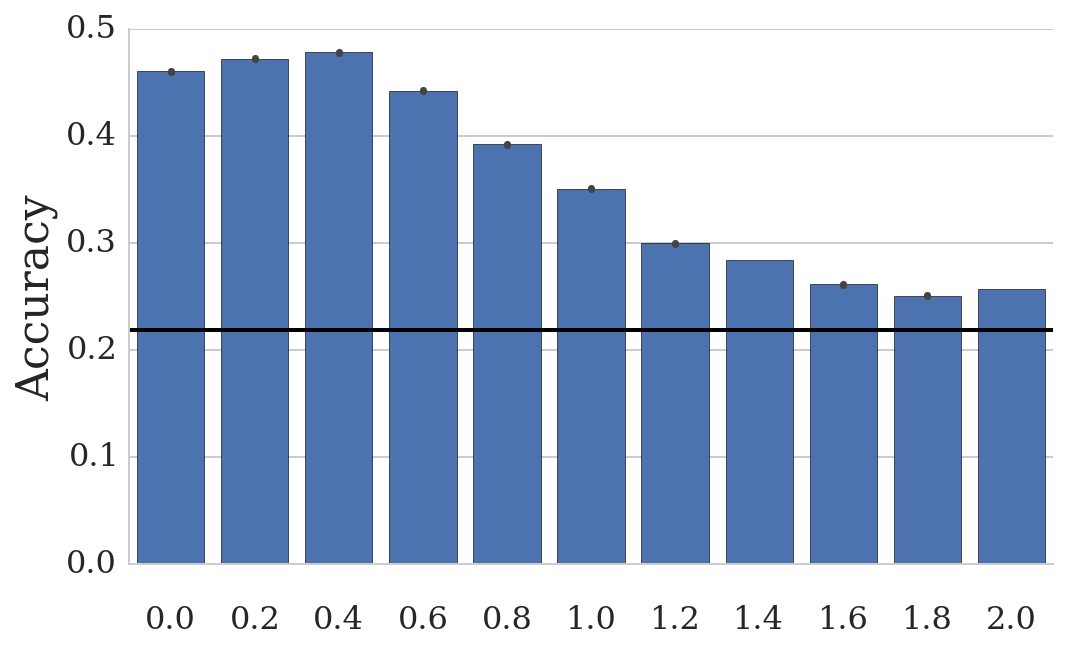

In [5]:
d = {'expansions__vectors__unlabelled_percentage': 100,
     'labelled': 'amazon_grouped-tagged',
     'expansions__vectors__dimensionality': 100,
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
     'expansions__vectors__composer': 'Add',
     'expansions__vectors__rep': 0, 
     'expansions__allow_overlap': False,
     'expansions__k': 3,
     'expansions__vectors__unlabelled': 'wiki',
     'expansions__vectors__algorithm': 'word2vec',
     'document_features_tr': 'J+N+AN+NN',
     'document_features_ev': 'AN+NN',
     'labelled': 'amazon_grouped-tagged'}
plot(d)
plt.savefig('plot-noise-gigaword-add-amazon.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

experiments are [174]
id 174 noise 0.00, acc 0.64, macrof1 0.61
folds has 500 values
noise has 500 values
Accuracy has 500 values


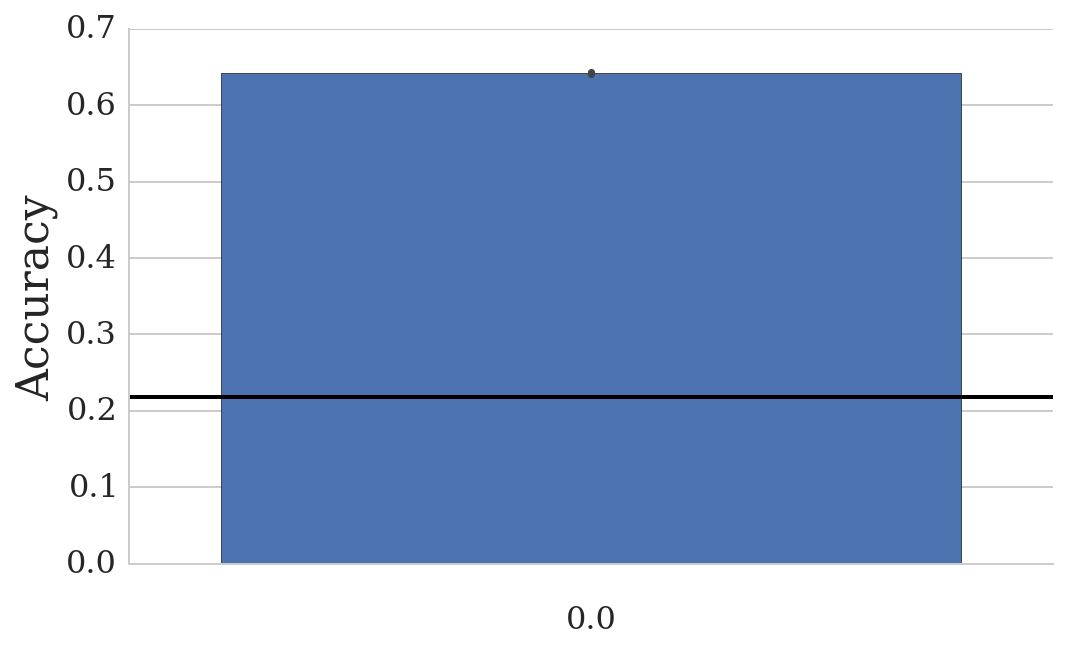

In [4]:
d['labelled'] = 'reuters21578/r8-tagged-grouped'
plot(d)
plt.savefig('plot-noise-gigaword-add-r2.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)